In [181]:
import yaml
import pandas as pd
with open('config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)
train_df = pd.read_csv(cfg['selary']['train_dataset'], low_memory=False)

In [2]:
from random import randrange
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

In [149]:
def dropping(train_df, colums):
    print(colums)
    for i in colums:
        train_df.drop(columns=[i], inplace=True)
    return train_df
train_df = dropping(train_df, ['ID', 'Name', 'SSN', 'Customer_ID'])


In [ ]:
def hide(train_df):
    train_df['Month'] = pd.Series(label_encoder.fit_transform(train_df['Month']))
    train_df['Occupation'] = pd.Series(label_encoder.fit_transform(train_df['Occupation']))
    train_df['Type_of_Loan'] = pd.Series(label_encoder.fit_transform(train_df['Type_of_Loan']))
    train_df['Payment_Behaviour'] = pd.Series(label_encoder.fit_transform(train_df['Payment_Behaviour']))
    train_df['Credit_Score'] = train_df['Credit_Score'].replace({'Poor': 0, 'Standard': 1, 'Good':2})
    train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].replace({'No': 0, 'NM': 1, 'Yes':2})
    train_df['Credit_Mix'] = train_df['Credit_Mix'].replace({'Bad': 0, 'Standard': 1, '-':2, 'Good':3})

In [ ]:
def label_incode(train_df):
    col = ['Occupation', 'Type_of_Loan', 'Month', 'Credit_Mix', 'Payment_Behaviour', 'Credit_Score', 'Payment_of_Min_Amount']
    for i in col:
        train_df[i] = pd.Series(label_encoder.fit_transform(train_df[i]))
    return train_df
label_encoderr = LabelEncoder()
label_encoder = LabelEncoder()


In [ ]:
def parse_data(value):
    if type(value) == float:
        return value
    else: return int(value.split(' ')[0]) *12 + int(value.split(' ')[3])
train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(parse_data)

In [ ]:
def convert_to_float_or_random(value):
    if type(value) == float:
        return value
    elif type(value) is int:
        return value
    elif value == '__10000__':
        return 11111111111111111
    elif value == "__-333333333333333333333333333__":
        return 33333333333333333
    elif value == '_':
        return 0
    elif value[-1] == '_':
        try: return float(value[0:-1])
        except ValueError:
            print(value)
    else:
        try:
            return float(value)
        except ValueError:
            print(value)
train_df[train_df.select_dtypes(include='object').columns] =train_df.select_dtypes(include=['object']).map(convert_to_float_or_random)

In [ ]:
from sklearn.model_selection import train_test_split
X = train_df
X_train, X_test = train_test_split(X,  test_size=0.2, random_state=42)

In [ ]:
for col, upper_bound in (
    ('Age', 80),
    ('Num_Bank_Accounts', 20),
    ('Num_Credit_Card', 20),
    ('Interest_Rate', 40),
    ('Num_of_Loan', 20),
    ('Num_of_Delayed_Payment', 40),
    ('Num_Credit_Inquiries', 25),
    ('Amount_invested_monthly',400 ),
    ('Total_EMI_per_month', 250),
    ('Annual_Income', 100000),
    ('Monthly_Balance', 600 )
):
    X_train = X_train.drop(X_train[X_train[col] > X_train[col].quantile(.95)].index)
    X_test = X_test.drop(X_test[X_test[col] > X_test[col].quantile(.95)].index)

for col, down_bound in (
    ('Age', 1),
    ('Num_Bank_Accounts', 0),
    ('Num_Credit_Card', 0),
    ('Interest_Rate', 0),
    ('Num_of_Loan', 0),
    ('Num_of_Delayed_Payment', 0),
    ('Num_Credit_Inquiries', 0),
        
    ('Amount_invested_monthly',0 )
):
    
    
    X_train = X_train.drop(X_train[X_train[col] < down_bound].index)
    X_test = X_test.drop(X_test[X_test[col] < down_bound].index)

In [ ]:
def salary (df):
    if df['Monthly_Inhand_Salary'].isnull().any():
        df['Monthly_Inhand_Salary'] = df['Annual_Income']/12
        return df
X_train = salary(X_train)
X_test = salary(X_test)

In [ ]:
def drop_missing(train_df):
    num_сols_with_missing = [col for col in train_df.columns
                         if train_df[col].isnull().any()]
    train_df=train_df.dropna(subset=num_сols_with_missing)
    return train_df
X_train = drop_missing(X_train)
X_test = drop_missing(X_test)

In [216]:
X1, X2, X3 = 1.2288, 1.2877,1.4701
x1a, x1b, x2a, x2b, x3a, x3b = 0.0983, 0.1564, 0.0734, 0.0483, 0.1198, 0.1666

x1, x2, x3 = X1, X2, X3
for i in range(10):
    x11 = X1 - x2*x1a - x3*x1b
    x22 = X2 - x1*x2a - x3*x2b
    x33 = X3- x1*x3a - x2*x3b
    i+=1
    if ((1-0.2864)/0.2864)*0.0001 > max(abs(x11-x1), abs(x22-x2), abs(x33-x3)):
        print(i,x11, x22, x33, max(abs(x11-x1), abs(x22-x2), abs(x33-x3)))
        break
    print(i, x11,x22,x33)
    x1, x2, x3 = x11, x22, x33

1 0.87229545 1.12650025 1.10835894
2 0.944717687209 1.1701397771680002 1.17792406344
3 0.9295479363823695 1.1614639894947074 1.161977534196173
4 0.9328948034843887 1.1633476665678588 1.165240256571574
5 0.9321993482485852 1.162944417031839 1.1645254812923649
6 0.9323507785316442 1.1630299870921328 1.164675978202315 0.0001514302830589731


In [221]:
train_df = pd.read_csv(cfg['selary']['train_dataset'], low_memory=False)

train_df = dropping(train_df, ['ID', 'Name', 'SSN', 'Customer_ID'])

train_df['Type_of_Loan'] = train_df['Type_of_Loan'].fillna("Not Specified")

label_encoderr = LabelEncoder()

train_df = label_incode(train_df)

train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(parse_data)

train_df[train_df.select_dtypes(include='object').columns] =train_df.select_dtypes(include=['object']).map(convert_to_float_or_random)

from sklearn.model_selection import train_test_split
X = train_df
X_train, X_test = train_test_split(X,  test_size=0.2, random_state=42)

for col, upper_bound in (
    ('Age', 80),
    ('Num_Bank_Accounts', 20),
    ('Num_Credit_Card', 20),
    ('Interest_Rate', 40),
    ('Num_of_Loan', 20),
    ('Num_of_Delayed_Payment', 40),
    ('Num_Credit_Inquiries', 25),
    ('Amount_invested_monthly',400 ),
    ('Total_EMI_per_month', 250),
    ('Annual_Income', 100000),
    ('Monthly_Balance', 600 )

):
    X_train = X_train.drop(X_train[X_train[col] > X_train[col].quantile(.95)].index)
    X_test = X_test.drop(X_test[X_test[col] > X_test[col].quantile(.95)].index)

for col, down_bound in (
    ('Age', 1),
    ('Num_Bank_Accounts', 0),
    ('Num_Credit_Card', 0),
    ('Interest_Rate', 0),
    ('Num_of_Loan', 0),
    ('Num_of_Delayed_Payment', 0),
    ('Num_Credit_Inquiries', 0),
        
    ('Amount_invested_monthly',0 )

):
    
    
    X_train = X_train.drop(X_train[X_train[col] < down_bound].index)
    X_test = X_test.drop(X_test[X_test[col] < down_bound].index)

        
X_train = salary(X_train)
X_test = salary(X_test)
    
X_train = drop_missing(X_train)
X_test = drop_missing(X_test)



In [203]:
class HotEncode:
    def __init__(self, train_df):
        self.train_df = train_df

    def encoderr(self, odf):
        encoder = OneHotEncoder(sparse_output=False)
        df = odf.to_frame()
        encodedData = encoder.fit_transform(df)
        encoded_df = pd.DataFrame(encodedData, columns=encoder.get_feature_names_out(df.columns))
        self.train_df.drop(columns=[odf.name], inplace=True)
        self.train_df = pd.concat([self.train_df,encoded_df], axis=1)
        return self.train_df

encoder = HotEncode(train_df)
train_df = encoder.encoderr(train_df['Payment_Behaviour'])
train_df = encoder.encoderr(train_df['Payment_of_Min_Amount'])
train_df = encoder.encoderr(train_df['Credit_Mix'])
#train_df = encoder.encoderr(train_df['Credit_Score'])

In [222]:
print(f"Размеры X_train и y_train: {X_train.shape}")
print(f"Размеры X_test и y_test: {X_test.shape}")


Размеры X_train и y_train: (37561, 24)
Размеры X_test и y_test: (9381, 24)


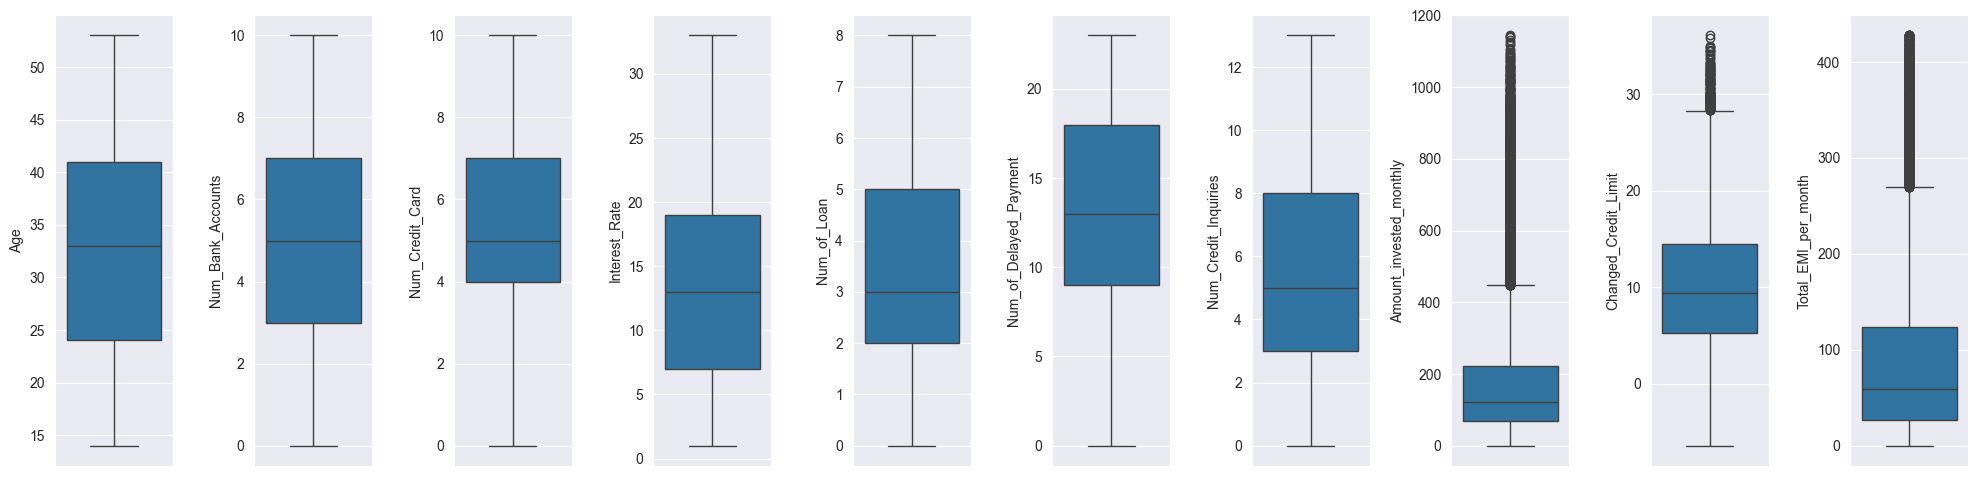

In [219]:
out_col = ['Age', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Amount_invested_monthly', 'Changed_Credit_Limit', 'Total_EMI_per_month' ]

fig, axes = plt.subplots(1,10, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=X_train[col], data=X_train, ax=ax)
fig.tight_layout(pad=1.5)

In [52]:

bins = [0, 1000, 2000, 3000, 4000, 5000,6000,7000,8000, 10000]
lab  = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-10000']
train_df['Interval'] = pd.cut(train_df['Monthly_Inhand_Salary'], bins=bins, labels=lab)
occupation_group = train_df.groupby('Interval', observed=False)
salary_in = (
    
    occupation_group['Amount_invested_monthly'].mean().reset_index(name = 'Anual_mean')
)

train_df
'''
fig, axes = plt.subplots(1,2,figsize=(22,8))
axes[0].tick_params(axis='x', rotation=90)
sns.barplot(x='Interval', y='Anual_mean', data=salary_in, ax=axes[0])
sns.barplot()
'''
(train_df['Interval'].value_counts())

Interval
1000-2000     21147
2000-3000     13264
3000-4000      9669
5000-6000      6847
0-1000         6724
4000-5000      6369
8000-10000     5565
6000-7000      5374
7000-8000      3797
Name: count, dtype: int64

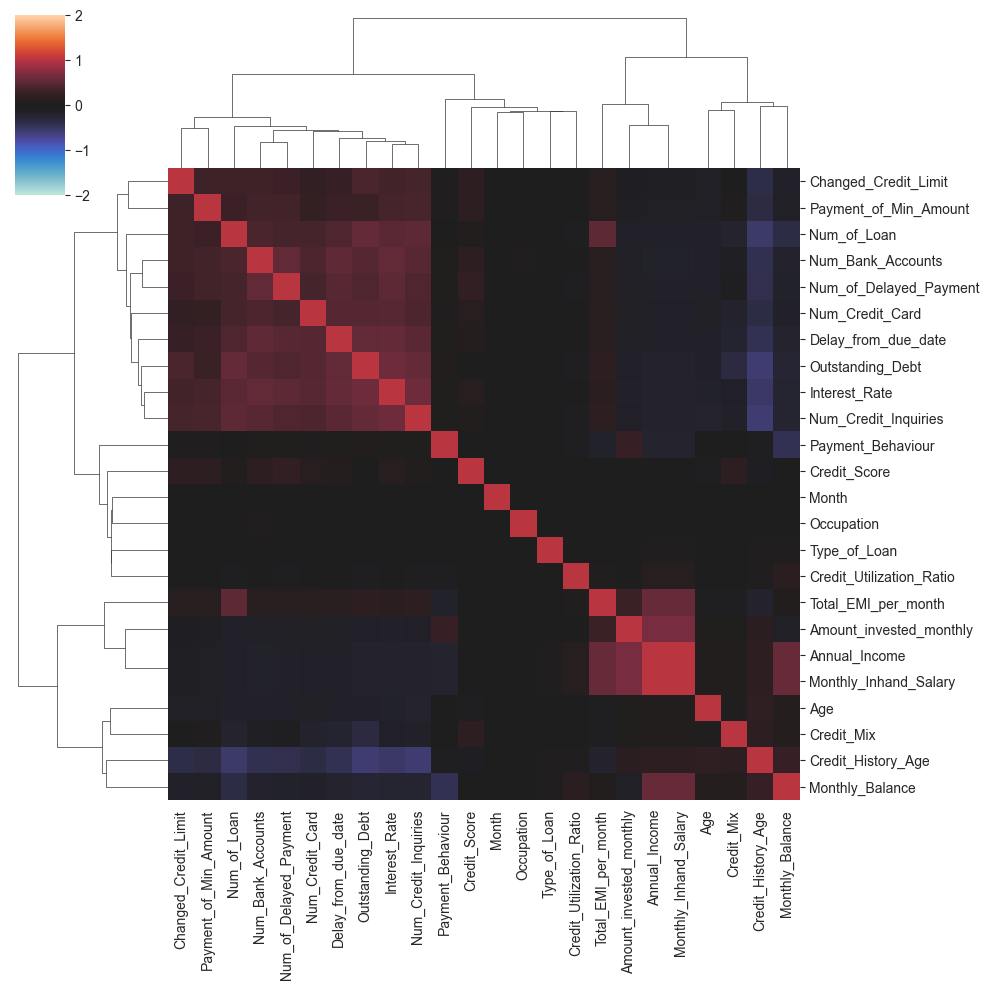

In [195]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-2.0,
        vmax=2.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )

corrplot(X_train, annot=None)


In [223]:
X_train.to_csv(r'D:\study\AI\PredictCreditScoreinit\train_2.csv', header=True, index=True)
X_test.to_csv(r'D:\study\AI\PredictCreditScoreinit\test_2.csv', header=True, index=True)

In [37]:
list_of_anime = ['Angle of bloodwasting', 'Второй сезон убийцы', 'In other world with penis', 'Fire to se', 'Entrance where chop our her second', 'Initial D 2', 'Charlotka']
a = randrange(7)
print(list_of_anime[a])

Второй сезон убийцы
